<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/cvs_resp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     | 43.8MB 85.2MB/s
     |████████████████████████████████| 81kB 4.3MB/s 
     |████████████████████████████████| 604kB 8.6MB/s 
     |████████████████████████████████| 3.1MB 13.9MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 296kB 24.7MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232425 sha256=72c45542cad1a37fb025b922a2e35445c4369bafd2251ccb38361db2133242d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-ykch45xi/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=886e33394e7531a7a7db444f71d13b2b7ecacd079fda872977822853d3e12e21
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uni

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

%matplotlib inline

In [3]:
path = '/gdrive/My Drive/'

In [4]:
cvs_resp = pd.read_csv(path + 'data_cvs_resp.csv')

In [5]:
cvs_resp.sample(5)

Unnamed: 0    HR  O2Sat    SBP  ...  Resp   Age  Gender  SepsisLabel
492859       492859  94.0   98.0  130.0  ...  13.0  53.8       1            0
969574       969574  77.5   99.5  105.5  ...  16.0  51.0       1            0
972697       972697  93.0  100.0  138.0  ...  18.0  65.0       0            0
19083         19083  94.0   99.0  120.0  ...  14.0  31.7       1            0
1053317     1053317  94.0   98.0   97.5  ...  18.0  79.0       0            0

[5 rows x 10 columns]

In [6]:
cvs_resp.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
cvs_resp.sample(5)

HR  O2Sat    SBP   MAP   DBP  Resp    Age  Gender  SepsisLabel
579831   67.0   99.0  111.0  64.0  50.0  14.0  86.73       0            0
440143   67.0   97.0  100.0  87.0  74.0  13.0  67.15       1            0
977972   93.0   99.0  115.0  89.0  72.0  25.0  31.00       0            0
209171  106.0  100.0   97.5  70.0  61.0  16.0  39.17       0            1
683163   66.0   96.0  131.0  76.0  56.0  13.0  68.72       1            0

In [8]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(cvs_resp)

In [10]:
profile

In [11]:
profile.to_notebook_iframe()

In [12]:
profile.to_file(output_file=path + 'cvs_resp.html')

In [14]:
cvs_resp.SepsisLabel.value_counts()

0    1144776
1      22426
Name: SepsisLabel, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


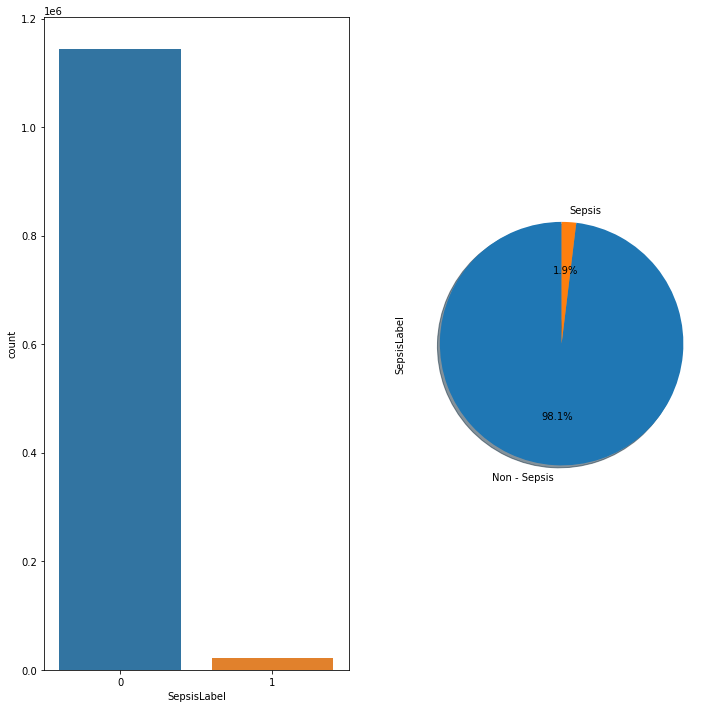

In [15]:
fig1, ax1 = plt.subplots(1,2, figsize =(12,12))
sns.countplot(cvs_resp['SepsisLabel'],ax=ax1[0])
labels = 'Non - Sepsis', 'Sepsis'
cvs_resp.SepsisLabel.value_counts().plot.pie(labels=labels, autopct ='%1.1f%%', shadow=True, startangle =90)

In [16]:
cor = cvs_resp.corr()
cor

HR     O2Sat       SBP  ...       Age    Gender  SepsisLabel
HR           1.000000 -0.068332 -0.026570  ... -0.155839 -0.025363     0.042771
O2Sat       -0.068332  1.000000  0.011994  ... -0.053977 -0.044508    -0.005004
SBP         -0.026570  0.011994  1.000000  ...  0.019665 -0.007965    -0.010055
MAP          0.084683  0.024077  0.752122  ... -0.147943  0.011854    -0.014940
DBP          0.115483  0.003070  0.452648  ... -0.221702  0.021060    -0.010496
Resp         0.215084 -0.160738  0.052169  ...  0.044520  0.006919     0.040277
Age         -0.155839 -0.053977  0.019665  ...  1.000000 -0.044153     0.000769
Gender      -0.025363 -0.044508 -0.007965  ... -0.044153  1.000000     0.008749
SepsisLabel  0.042771 -0.005004 -0.010055  ...  0.000769  0.008749     1.000000

[9 rows x 9 columns]

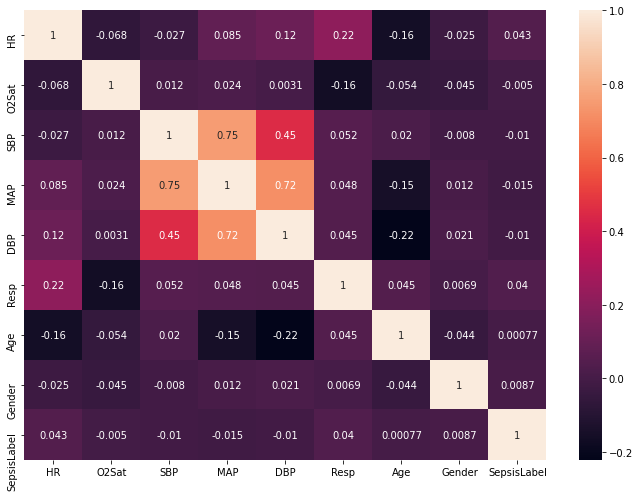

In [17]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(cor, annot=True)

In [18]:
pd.crosstab(cvs_resp['HR'], cvs_resp['SepsisLabel'])

SepsisLabel       0     1
HR                       
64.0         118519  1608
64.5            682     5
65.0          12663   159
65.5            800     5
66.0          15357   192
...             ...   ...
104.0         11211   301
104.5           655    19
105.0          9290   277
105.5           627    18
106.0        119293  4449

[92 rows x 2 columns]

In [19]:
X = cvs_resp.drop('SepsisLabel', axis=1)
y = cvs_resp.SepsisLabel

In [20]:
#Train-Test split using stratified random sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=4)

In [21]:
from sklearn.preprocessing import StandardScaler

#Standardize the data - Feature Scaling
sc_a = StandardScaler()
X_train = sc_a.fit_transform(X_train)
X_test = sc_a.transform(X_test)

In [22]:
from sklearn.naive_bayes import GaussianNB # I am using Gaussian algorithm from Naive Bayes

# Lets creat the model
sepsis_model = GaussianNB()

sepsis_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
sepsis_train_predict = sepsis_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, sepsis_train_predict)))
print()

Model Accuracy: 0.9808



In [24]:
sepsis_test_predict = sepsis_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, sepsis_test_predict)))
print()

Model Accuracy: 0.9808



In [25]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, sepsis_test_predict, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, sepsis_test_predict, labels=[1, 0]))

Confusion Matrix
[[     0   6728]
 [     0 343433]]

Classification Report


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6728
           0       0.98      1.00      0.99    343433

    accuracy                           0.98    350161
   macro avg       0.49      0.50      0.50    350161
weighted avg       0.96      0.98      0.97    350161



In [26]:
from sklearn.ensemble import RandomForestClassifier
sepsis_rf_model = RandomForestClassifier(random_state=52)
sepsis_rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=52, verbose=0,
                       warm_start=False)

In [27]:
rf_train_predict = sepsis_rf_model.predict(X_train)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_train, rf_train_predict)))

Model Accuracy: 1.00


In [28]:
rf_test_predict = sepsis_rf_model.predict(X_test)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, rf_test_predict)))

Model Accuracy: 0.98


In [29]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_test_predict, labels=[1, 0]))

Confusion Matrix
[[   138   6590]
 [   174 343259]]

Classification Report
              precision    recall  f1-score   support

           1       0.44      0.02      0.04      6728
           0       0.98      1.00      0.99    343433

    accuracy                           0.98    350161
   macro avg       0.71      0.51      0.51    350161
weighted avg       0.97      0.98      0.97    350161



In [30]:
from sklearn.linear_model import LogisticRegression

sepsis_lr_model = LogisticRegression(C=0.7, random_state=52)
sepsis_lr_model.fit(X_train, y_train.ravel())
lr_test_predict = sepsis_lr_model.predict(X_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, lr_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_test_predict, labels=[1, 0]))

Model Accuracy: 0.98

Confusion Matrix
[[     0   6728]
 [     0 343433]]

Classification Report


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6728
           0       0.98      1.00      0.99    343433

    accuracy                           0.98    350161
   macro avg       0.49      0.50      0.50    350161
weighted avg       0.96      0.98      0.97    350161

